<a href="https://colab.research.google.com/github/MusaibSyd/Machine-learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Advertising.csv')

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


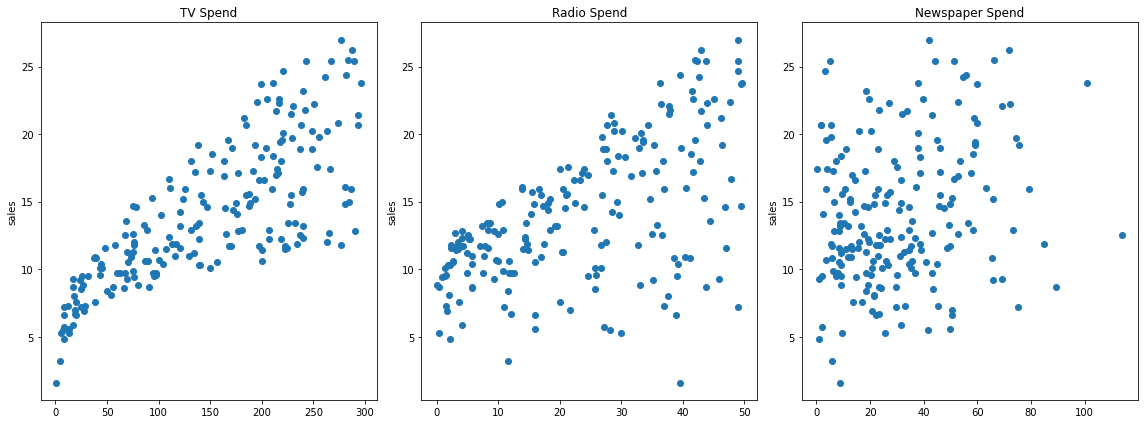

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('sales')
axes[2].set_title('Newspaper Spend')
plt.tight_layout();


In [9]:
X = df.drop('sales',axis=1)
y = df['sales']

In [10]:
X.shape, y.shape

((200, 3), (200,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
X_train.shape, X_test.shape

((140, 3), (60, 3))

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
test_predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
df['sales'].mean()

14.0225

In [31]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [40]:
test_residuals = y_test - test_predictions

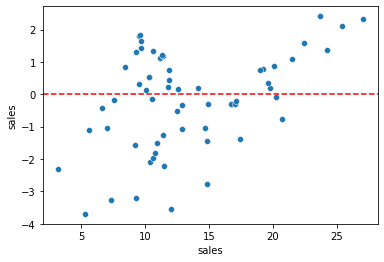

In [43]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

In [44]:
final_model = LinearRegression()

In [45]:
final_model.fit(X,y)

LinearRegression()

In [47]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [49]:
from joblib import dump,load

In [50]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [52]:
loaded_model = load('final_sales_model.joblib')

In [53]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])